In [1]:
#https://www.kaggle.com/code/redwankarimsony/malaria-cell-classification-efficentnet
#Malaria Cell Classification [EfficentNet]
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadlaghari","key":"d6e7a38a3b6434d41f89b0aad3587a98"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [3]:
#than copy the kaggle API
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 99% 667M/675M [00:02<00:00, 264MB/s]
100% 675M/675M [00:02<00:00, 343MB/s]


In [4]:
!ls

cell-images-for-detecting-malaria.zip  kaggle.json  sample_data


In [ ]:
!unzip cell-images-for-detecting-malaria.zip

In [6]:
!ls

cell_images  cell-images-for-detecting-malaria.zip  kaggle.json  sample_data


## Evaluate performance on test dataset

In [30]:
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_generator = eval_datagen.flow_from_directory(
        test_dir,target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
eval_generator.reset()
pred = model.predict(eval_generator,1000,verbose=1)
print("Predictions finished")

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 296ms/step
Predictions finished


In [33]:
#View confusion matrix
from sklearn.metrics import confusion_matrix
import numpy
y_pred = numpy.rint(pred)
y_true = eval_generator.classes
print (confusion_matrix(y_true, y_pred))

[[  0 500]
 [  0 500]]


## Confusion Matrix

In [34]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'

## Visualizing our predictions vs actual results

In [ ]:
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    image_path = test_dir + "/" +eval_generator.filenames[index]
    img = mpimg.imread(image_path)

    plt.imshow(img)
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% B")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% A")
    plt.show()

In [7]:
!ls

cell_images  cell-images-for-detecting-malaria.zip  kaggle.json  sample_data


In [8]:
# Basic Libraries for Data Manipulations
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt

# Machine Learning Libraries.
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
IMAGE_DIR = 'cell_images/cell_images/'
IMG_SIZE = (128, 128)
BATCH_SIZE = 64

In [10]:
datagen = ImageDataGenerator(rescale=1/255.0,
                             validation_split=0.2,
                             rotation_range=5.0,
                             width_shift_range=5.0,
                             height_shift_range=5.0,
                             horizontal_flip=True,
                             vertical_flip=True)

train_datagen = datagen.flow_from_directory(directory=IMAGE_DIR,
                                            target_size= IMG_SIZE,
                                            class_mode = 'binary',
                                            batch_size = 16,
                                            subset='training')

valid_datagen = datagen.flow_from_directory(directory = IMAGE_DIR,
                                           target_size = IMG_SIZE,
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:
X, Y = next(train_datagen)
print('Train Input  batch Shape: ', X.shape)
print('Train Output batch Shape: ', Y.shape)

rows = int(np.sqrt(X.shape[0]))
cols = int(np.sqrt(X.shape[0]))

fig = plt.figure(figsize=(15,15))
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(np.squeeze(X[i-1]))
    plt.title(str(Y[i-1]), fontsize=16)
    plt.axis(False)
    fig.add_subplot

In [12]:
# Model Creation:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


# Model Summary
model.summary()

# Model Compilation
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Model Training
history = model.fit(train_datagen,
                    steps_per_epoch=len(train_datagen),
                    epochs=2,validation_data = valid_datagen,
                              validation_steps=len(valid_datagen))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,529 (3.15 MB)

 Trainable params: 826,529 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 143s 97ms/step - accuracy: 0.6425 - loss: 0.6238 - val_accuracy: 0.9252 - val_loss: 0.2075
Epoch 2/2
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 129s 94ms/step - accuracy: 0.9427 - loss: 0.2030 - val_accuracy: 0.9388 - val_loss: 0.1687


In [13]:
!pip install -q efficientnet
!pip install -q pyyaml h5py

import efficientnet.tfkeras as efn
import tensorflow.keras.layers as Layers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


In [14]:
import tensorflow as tf

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model_efn_b0 = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(*IMG_SIZE, 3),
            weights='imagenet',
            include_top=False
        ),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model_efn_b0.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

model_efn_b0.summary()

16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnet-b0 (Functional)    │ (None, 4, 4, 1280)     │     4,049,564 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,845 (15.45 MB)

 Trainable params: 4,008,829 (15.29 MB)

 Non-trainable params: 42,016 (164.12 KB)

In [15]:
def build_lrfn(lr_start=1e-5, lr_max=1e-4,
               lr_min=0, lr_rampup_epochs=8,
               lr_sustain_epochs=1, lr_exp_decay=.8):

    def lrfn(epoch):
        if epoch < lr_rampup_epochs:
            lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
        elif epoch < lr_rampup_epochs + lr_sustain_epochs:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) *\
                 lr_exp_decay**(epoch - lr_rampup_epochs\
                                - lr_sustain_epochs) + lr_min
        return lr
    return lrfn

lrfn = build_lrfn()
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

In [16]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_efnB0_best_val_acc.weights.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [17]:
history = model_efn_b0.fit(train_datagen,
                           epochs=2,
                           steps_per_epoch=len(train_datagen),
                           validation_data = valid_datagen,
                           validation_steps=len(valid_datagen),
                           callbacks=[lr_schedule, model_checkpoint],
                           verbose = 1)


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/2
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 256s 171ms/step - accuracy: 0.8318 - loss: 0.3959 - val_accuracy: 0.9461 - val_loss: 0.1440 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.125e-05.
Epoch 2/2
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 245s 160ms/step - accuracy: 0.9520 - loss: 0.1430 - val_accuracy: 0.9555 - val_loss: 0.1249 - learning_rate: 2.1250e-05


In [20]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(fontsize = 'x-large')


    plt.subplot(2,1,2)
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.grid(True)
    plt.show()

    #plt.figure(figsize=(10,5))
    #plt.plot(history.history['lr'], label = 'lr', marker = '*',linewidth = lw)
    #plt.title('Learning Rate')
    #plt.xlabel('Epochs')
    #plt.ylabel('Learning Rate')
    #plt.grid(True)
    #plt.show()

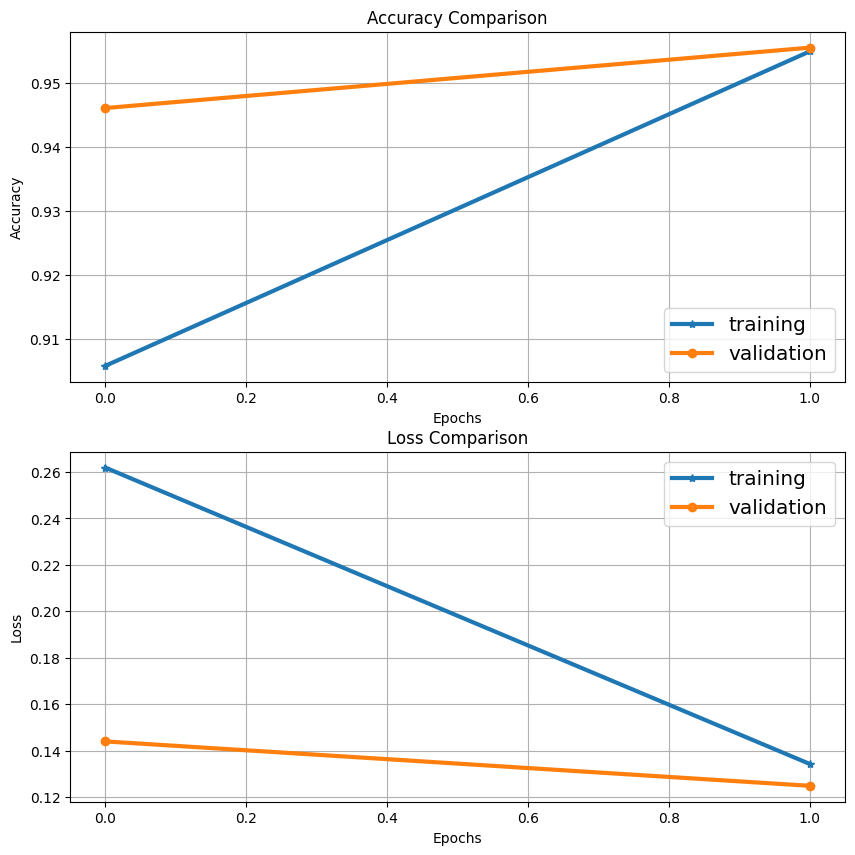

In [21]:
visualize_training(history)

In [22]:
labels_test = []
for i in range(0, len(valid_datagen)):
    labels_test.extend(np.array(valid_datagen[i][1]))

labels_test = np.array(labels_test, dtype = 'int64')


labels_predict = model_efn_b0.predict(valid_datagen)

345/345 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

labels_predict =  ((labels_predict > 0.5)*1).squeeze()

print(classification_report(labels_test, labels_predict,
                            labels = [1,0],
                            target_names = ['Parasitized', 'Uninfected']) )

              precision    recall  f1-score   support

 Parasitized       0.94      0.98      0.96      2755
  Uninfected       0.97      0.93      0.95      2755

    accuracy                           0.95      5510
   macro avg       0.96      0.95      0.95      5510
weighted avg       0.96      0.95      0.95      5510



[[2571  184]
 [  67 2688]]


<Axes: >

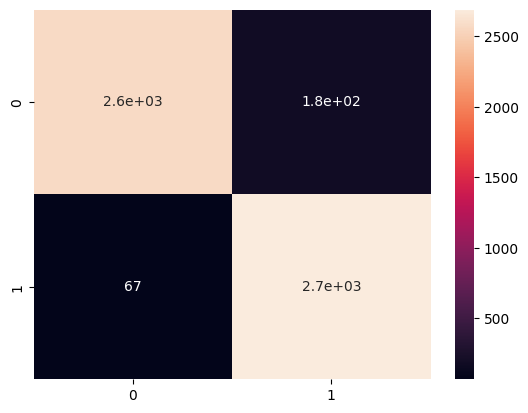

In [24]:
import seaborn as sns
print(confusion_matrix(labels_test, labels_predict))
sns.heatmap(confusion_matrix(labels_test, labels_predict), annot=True)

Area Under ROC-Curve:  0.9544464609800363


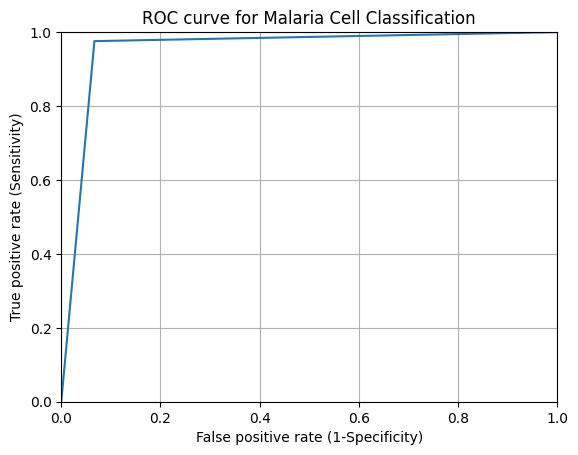

In [25]:
print('Area Under ROC-Curve: ', roc_auc_score(labels_test, labels_predict))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(labels_test, labels_predict , drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Malaria Cell Classification')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)